# Generate discharge forcing files on ED-SBS

In [ ]:
import numpy as np
import pandas as pd
from MITgcmutils import mds
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## I. Read discharge data

In [6]:
Disch_df = pd.read_csv('discharge_file.csv', sep=';')
Disch_df = Disch_df.set_index(pd.DatetimeIndex(Disch_df.date)).drop(columns='date')

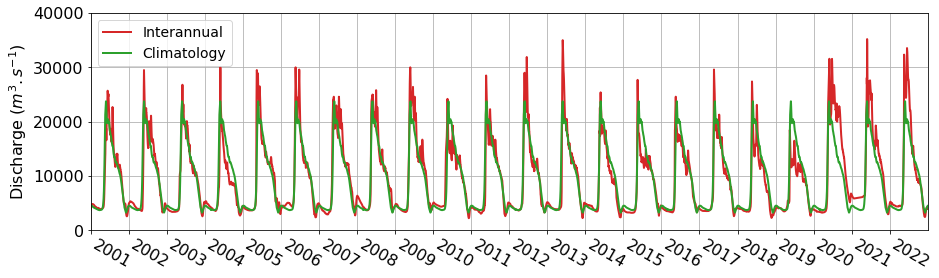

In [14]:
# Example with Mackenzie River discharge

## II. Read ED-SBS grid

In [ ]:
XC = mds.rdmds('XC')
YC = mds.rdmds('YC')
Area = mds.rdmds('rAc')
MaskC = mds.rdmds('maskInC')

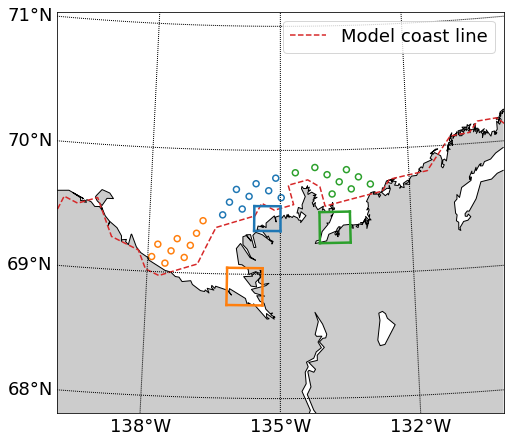

In [18]:
# Below are two ED-SBS matrixes with frocing
# cells positions and discharge distribution
# See plot below
inlet = np.load(MacIn_pth+'Inlets_'+str(dist)+'.npy')
w = np.load(MacIn_pth+'inletsW_'+str(dist)+'.npy')

## III. Create the freswater runoff matrix

$r[m.s^{-1}] = Q[m^3.s^{-1}]*W$ 

where $W = \frac{w}{A.N}$ with:
- $w$= runoff distribution matrix (<1)
- A = cell area
- N = Number of entry cells for the outlet

In [19]:
# Create the W matrix
id_inlet = np.where(inlet>0)
N = np.ones(inlet.shape)
for i in range(int(inlet.max())):
    N[np.where(inlet==i+1)] = list(inlet[id_inlet]).count(i+1)
W = w/(Area*N)
W_exp = np.repeat(np.expand_dims(W,axis=0), len(Disch_df),axis=0)

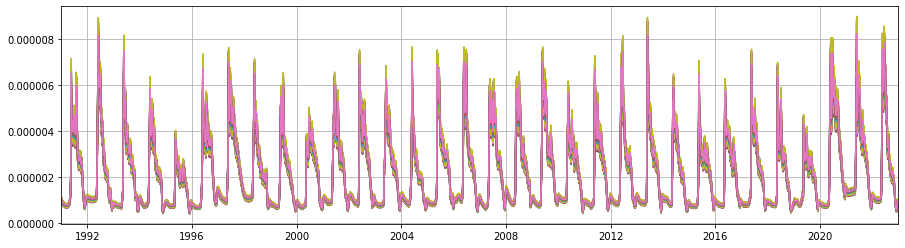

In [21]:
# Compute the runoff matrix
runoff = np.zeros((len(Disch_df),XC.shape[0],YC.shape[1]))
for j in range(len(id_inlet[0])):
    runoff[:,id_inlet[0][j],id_inlet[1][j]] = W_exp[:,id_inlet[0][j],id_inlet[1][j]]*Disch_df.discharge.values

## IV. Save Forcing matrixes

In [26]:
def bin_save(fnm, array):
    newFile = open(fnm, "wb")
    bitearray = pack(">%sf" % len(array.flatten()),*array.flatten())
    newFile.write(bitearray);

In [27]:
for yr in list(set(Date.year)):
    bin_save("output_path/output_name_"+str(yr),FWmac270[np.where(Date.year==yr)])